In [87]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


url = 'https://drive.google.com/uc?export=download&id=1tjEQ9k3EHM0kbuZXMmcgyCslss3LtVR6'
df = pd.read_table(url, sep='\t', decimal=',')

df.head()

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,11010,107,Female,PRIN09,4.056,2.198,2.955,2.790,2.475,3.628,...,4.157,2.465,2.835,4.280,3.448,3.171,2.959,5.095,3.688,2.520
1,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
2,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605
3,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
4,11150,105,Male,PRIN09,4.058,2.481,2.990,2.614,2.389,3.040,...,3.875,2.100,2.732,4.172,3.433,2.986,3.605,5.069,3.707,2.564


In [88]:
df = df.sort_values('Age', ignore_index=True)

In [89]:
df_orig = df.copy()
df_orig

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,41,21,Female,Seattle,4.298,2.497,2.902,2.793,2.463,3.095,...,3.610,2.143,2.510,3.812,2.944,3.181,3.072,4.667,3.682,3.551
1,26,22,Female,Seattle,4.338,2.185,3.078,2.965,2.445,3.704,...,4.091,2.353,2.658,4.128,3.218,3.312,2.847,5.020,3.720,2.408
2,42,22,Female,Seattle,4.341,2.952,2.897,2.697,2.352,3.222,...,3.576,2.270,2.534,3.841,2.979,3.232,2.875,4.702,3.761,2.372
3,7,22,Male,Seattle,4.155,2.281,3.062,2.743,2.459,3.112,...,4.213,2.159,2.738,4.382,3.446,3.167,2.958,5.189,3.655,2.466
4,15,23,Male,Seattle,4.161,2.576,3.019,2.694,2.470,3.129,...,4.113,2.181,2.740,4.384,3.475,3.142,2.940,5.222,3.680,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
167,11300,106,Female,PRIN09,4.142,2.278,3.037,2.770,2.414,3.600,...,3.455,2.264,2.717,3.866,2.942,3.162,2.871,4.504,3.787,2.471
168,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
169,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605


Нормализуем данные для линейной регрессии:

In [90]:
for col in df.iloc[:, 4:]:
    x_min = min(df[col])
    x_max = max(df[col])
    for i in range(len(df[col])):
        if df[col][i].dtype == 'float64':
            df.loc[i, col] = (df[col][i] - x_min)/(x_max - x_min)

In [91]:
df.head()

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,41,21,Female,Seattle,0.448333,0.439671,0.095989,0.410202,0.179837,0.235615,...,0.384511,0.093966,0.000000,0.134013,0.098724,0.405855,0.263370,0.330097,0.736059,1.000000
1,26,22,Female,Seattle,0.481667,0.154479,0.348138,0.592986,0.155313,0.604482,...,0.711277,0.275000,0.164994,0.364166,0.282740,0.493014,0.036327,0.641659,0.764312,0.046706
2,42,22,Female,Seattle,0.484167,0.855576,0.088825,0.308183,0.028610,0.312538,...,0.361413,0.203448,0.026756,0.155135,0.122230,0.439787,0.064581,0.360989,0.794796,0.016681
3,7,22,Male,Seattle,0.329167,0.242230,0.325215,0.357067,0.174387,0.245912,...,0.794158,0.107759,0.254181,0.549162,0.435863,0.396540,0.148335,0.790821,0.715985,0.095079
4,15,23,Male,Seattle,0.334167,0.511883,0.263610,0.304995,0.189373,0.256208,...,0.726223,0.126724,0.256410,0.550619,0.455339,0.379907,0.130172,0.819947,0.734572,0.223520


In [92]:
from sklearn .linear_model import LinearRegression

lr = LinearRegression()

regression = pd.DataFrame(columns=df.columns[4:], dtype='float64')

for col in df.iloc[:, 4:]:
    lr.fit(df['Age'].values.reshape(-1, 1), df[col])
    regression.loc['lin_coefs', col] = lr.coef_
    regression.loc['abs(lin_coefs)', col] = abs(lr.coef_)
    regression.loc['intercept', col] = lr.intercept_

regression

,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,ACP5,ACVR1B,ACVRL1,ACY1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
lin_coefs,-0.001217,0.000275,0.001690,-0.000120,0.002242,0.000032,0.001113,0.002140,0.000476,-0.001552,...,-0.001445,0.000212,0.002277,0.000595,0.001017,-0.001176,0.001021,-0.000888,0.000291,0.000348
abs(lin_coefs),0.001217,0.000275,0.001690,0.000120,0.002242,0.000032,0.001113,0.002140,0.000476,0.001552,...,0.001445,0.000212,0.002277,0.000595,0.001017,0.001176,0.001021,0.000888,0.000291,0.000348
intercept,0.421333,0.276994,0.194351,0.282132,0.158652,0.417287,0.593124,0.145006,0.186558,0.602331,...,0.677650,0.158134,0.119961,0.353178,0.247897,0.467307,0.101718,0.666618,0.721739,0.166852


5 показателей, которые сильнее всего изменяются в процессе
старения (имеют наибольшее значение модуля линейного коэффициента):

In [93]:
proteins = pd.Series(data=regression.iloc[1]).nlargest(n=5)
print(*proteins.index)

CCDC80 EFEMP1 GDF15 CHRDL1 PTN


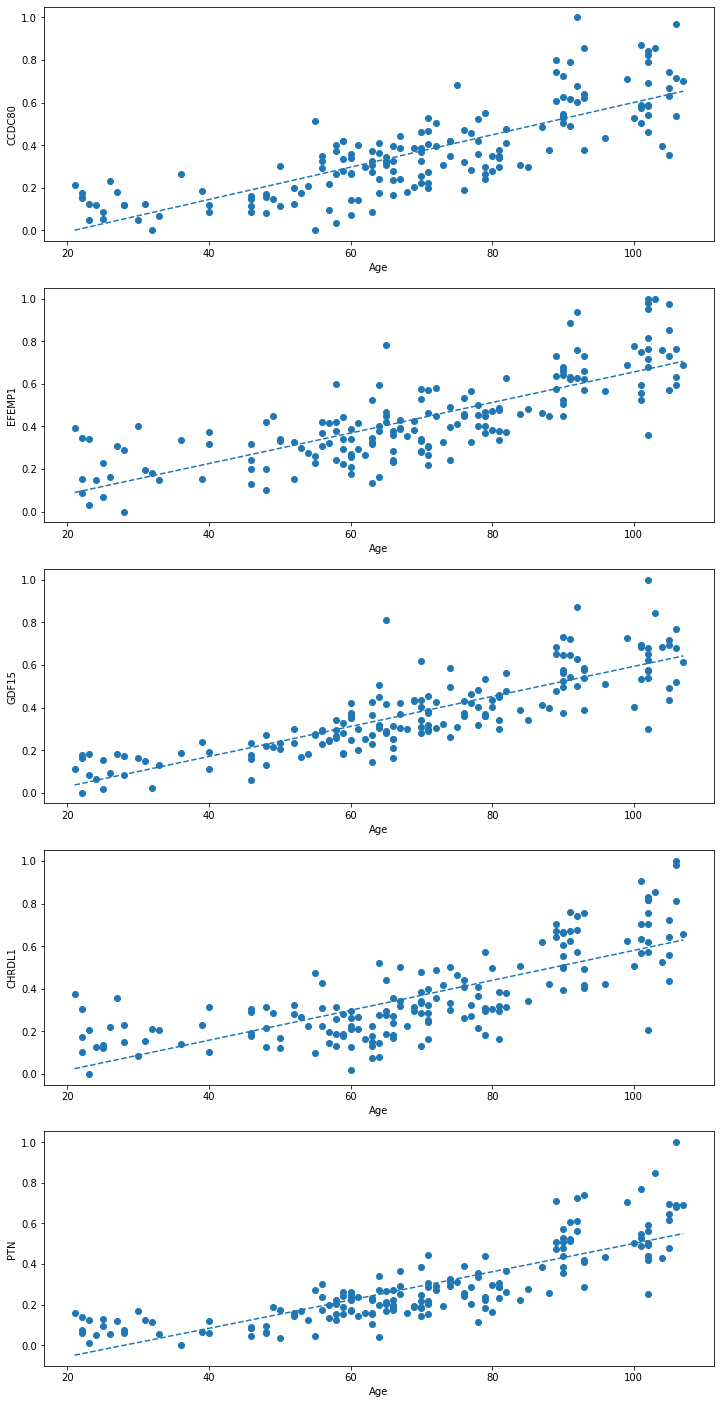

In [94]:
fig, axes = plt.subplots(5, figsize=(12, 25))

for i in range(5):
    col = proteins.index[i]
    axes[i].set(xlabel='Age', ylabel=col)

    axes[i].scatter(df['Age'], df[col])

    x = df['Age'].values
    y = regression[col][2] + regression[col][0] * x
    axes[i].plot(x, y, '--')

In [95]:
df_proteins = df_orig[proteins.index]

range1 = str(df_orig['Age'][0])+'-'+str(df_orig['Age'][56])
range2 = str(df_orig['Age'][57])+'-'+str(df_orig['Age'][113])
range3 = str(df_orig['Age'][114])+'-'+str(df_orig['Age'][170])
ranges = [range1, range2, range3]

df_proteins.loc[0:56, 'Age'] = range1
df_proteins.loc[57:113, 'Age'] = range2
df_proteins.loc[114: 170, 'Age'] = range3

Для каждого признака и пары возрастных диапазонов X, Y:<br>
H<sub>0</sub>: $\bar{X}$ = $\bar{Y}$<br>
H<sub>A</sub>: $\bar{X}$ $\neq$ $\bar{Y}$<br><br>

Пусть $\alpha$ = 0.05

21-61 v.s. 61-79: t-test independent samples with Bonferroni correction, P_val=7.085e-09 stat=-6.495e+00
61-79 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=4.905e-14 stat=-8.830e+00
21-61 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=4.044e-25 stat=-1.366e+01
21-61 v.s. 61-79: t-test independent samples with Bonferroni correction, P_val=1.674e-06 stat=-5.312e+00
61-79 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=9.495e-15 stat=-9.141e+00
21-61 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=1.326e-24 stat=-1.343e+01
21-61 v.s. 61-79: t-test independent samples with Bonferroni correction, P_val=3.903e-12 stat=-7.992e+00
61-79 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=1.307e-12 stat=-8.203e+00
21-61 v.s. 80-107: t-test independent samples with Bonferroni correction, P_val=2.602e-29 stat=-1.557e+01
21-61 v.s. 61-79: t-test independent samples with

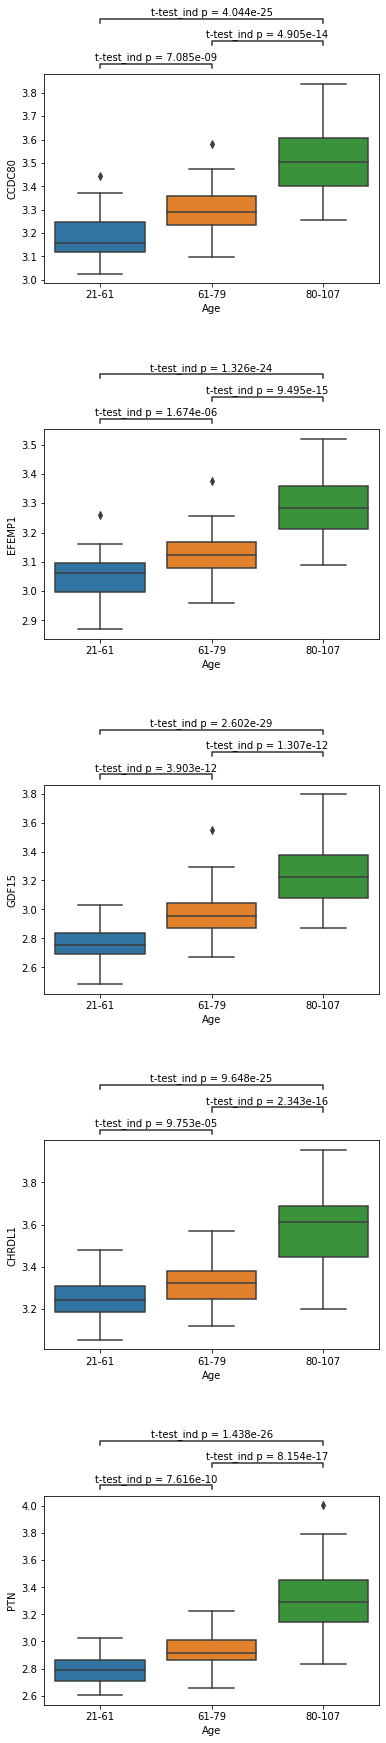

In [96]:
df_orig = df_orig.sort_values('Age')

fig, axes = plt.subplots(5, figsize=(6, 30))
plt.subplots_adjust(hspace=0.7)

x = "Age"
order = [range1, range2, range3]

for i in range(5):
    col = proteins.index[i]
    y = col

    axes[i].set(xlabel='Age', ylabel=col)

    sns.boxplot(data=df_proteins, x=x, y=y, order=order, ax=axes[i])

    add_stat_annotation(axes[i], data=df_proteins, x=x, y=y, order=order,
                    box_pairs=[(range1, range2), (range1, range3), (range2, range3)],
                    test='t-test_ind', text_format='full', loc='outside', verbose=2)

Для всех признаков все межвыборочные p-value < 0.05. Можно отвергнуть
нулевые гипотезы о равенстве средних значений признаков между
выборками возрастных диапазонов.
